<h1> About the datasets </h1>


The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

# Data Analysis

In [1]:
import pandas as pd
import numpy as np
from itertools import product
import seaborn as sns

In [2]:
creditcard = pd.read_csv("dataset/creditcard.csv")


In [3]:
creditcard

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
creditcard.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
import matplotlib.pyplot as plt
transactions = creditcard.Class.value_counts()

# Visualization of the datasets 

In [6]:
transactions

0    284315
1       492
Name: Class, dtype: int64

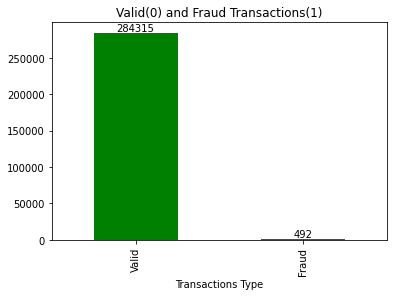

In [7]:
transactions.plot(kind= 'bar', color='g')
plt.title("Valid(0) and Fraud Transactions(1)");
plt.xlabel("Transactions Type")
Labels= ["Valid", "Fraud"]
plt.xticks(range(2), Labels)
## Keeping the text in the bar plot 
for i in range(len(Labels)):
    plt.text(i,transactions[i],str(transactions[i]), ha = 'center', va = 'bottom', color = 'black')
plt.show()

<b>duplicated() Methods<b>
The pandas.DataFrame.duplicated() method is used to find duplicate rows in a DataFrame. It returns a boolean series which identifies whether a row is duplicate or unique<br> 
<a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html" > Documentation For the Duplicated Method

In [8]:
creditcard.duplicated(keep='first').sum() #No of duplicated values 

1081

In [9]:
creditcard.drop_duplicates(keep ='first', inplace= True)

In [10]:
creditcard.duplicated(keep='first').sum() #No of duplicated values 

0

In [11]:
creditcard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


C:\Users\sapko\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of Transaction Time'}, ylabel='Density'>

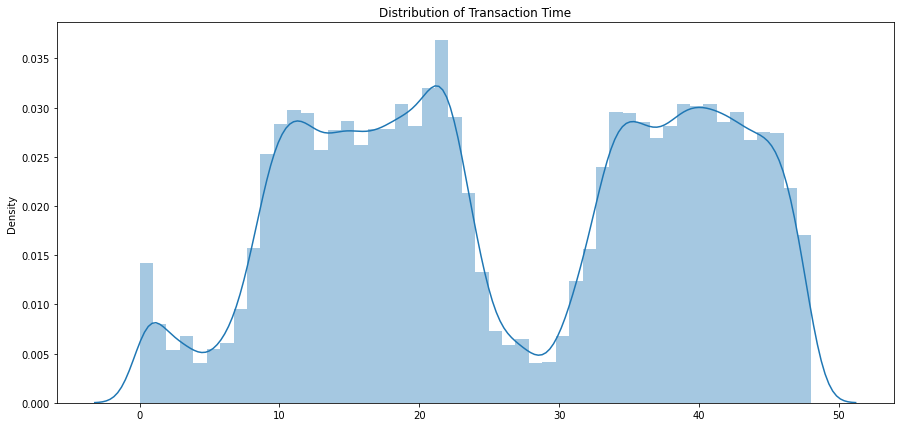

In [12]:
# Time Distribution plot for transactions 
plt.figure(figsize=(15,7))

plt.title('Distribution of Transaction Time')
sns.distplot(creditcard['Time'].values/(60*60))

Conclusion;the most transactions happened between 10 - 25 and then from 35 to 45

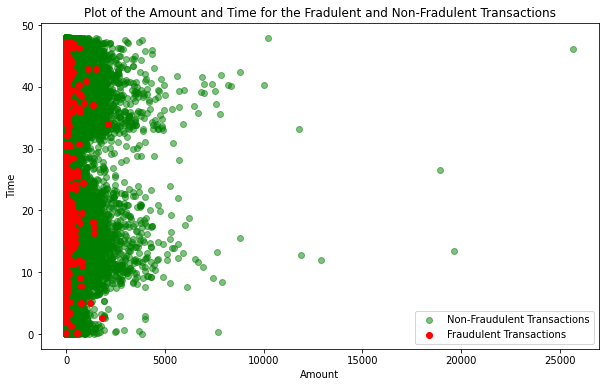

In [13]:
# Splitting between the fradulent and the non fradulent datas 
valid = creditcard[creditcard.Class == 0]
fraud = creditcard[creditcard.Class==1]
#A plot between the Amount and the time values 
fig = plt.figure(figsize=(10,6))
plt.scatter(valid.Amount, valid.Time.values/(60*60), label = "Non-Fraudulent Transactions",alpha = 0.5, color = 'green')
plt.scatter(fraud.Amount, fraud.Time.values/(60*60), label = "Fraudulent Transactions",alpha = 1,  color = 'red')
plt.legend()
plt.xlabel("Amount")
plt.ylabel("Time")
plt.title("Plot of the Amount and Time for the Fradulent and Non-Fradulent Transactions")
plt.show()

From the plot we can see that the fradulent transactions involves the lesser amount while there higher amounts had valid transactions with some outliers in the valid transaction can be seen in the scatter plots. 

[None, None, None, None]

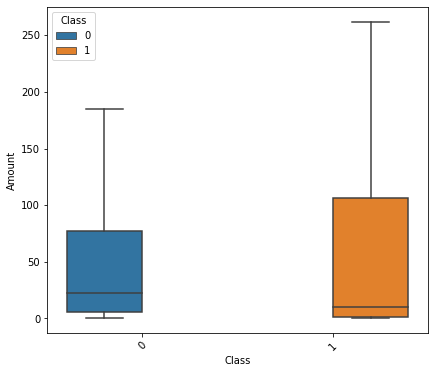

In [14]:
#Visuilzation for the Amount for the both classes 
plt.figure(figsize = (15, 6))
plt.subplot(121)
a = sns.boxplot(x = 'Class', y = 'Amount',hue='Class', data = creditcard, showfliers=False) 
plt.setp(a.get_xticklabels(), rotation=45)

Here the distribution of the amount for fraud transaction is much higher than valid transaction. 

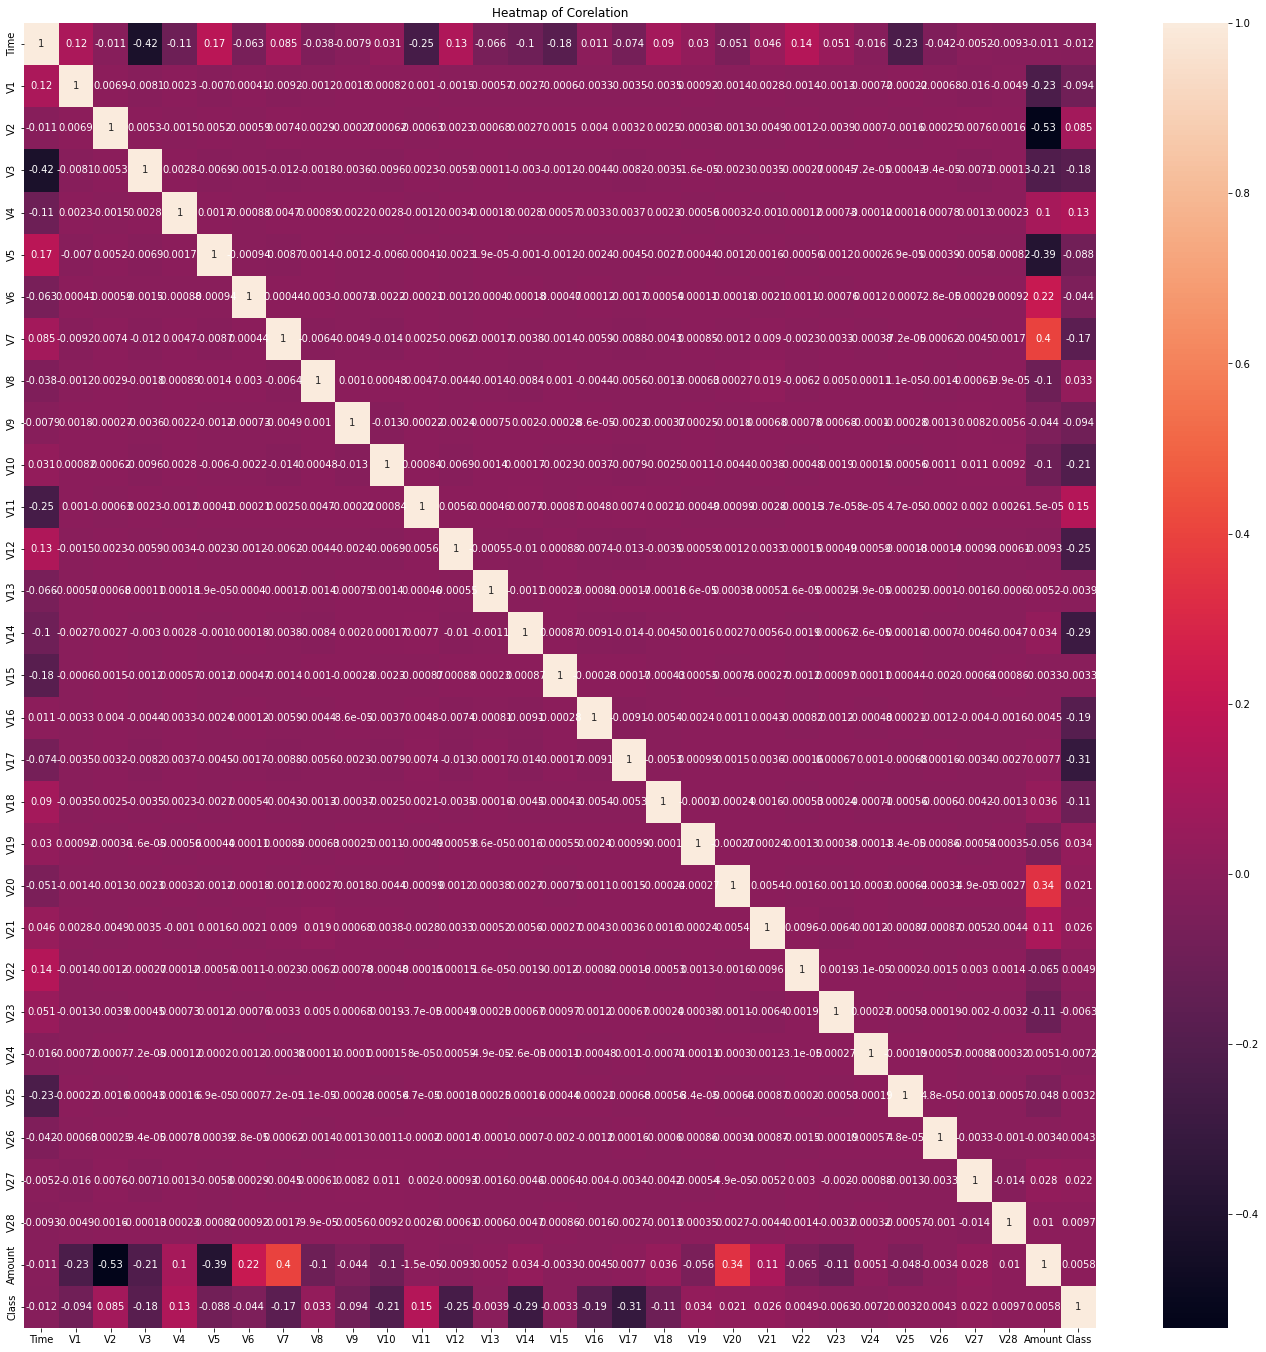

In [15]:
import seaborn as sns 
# Corelation 
corr = creditcard.corr()
plt.figure(figsize=(24,24))
sns.heatmap(data = corr, annot=True)
plt.title("Heatmap of Corelation");

## About the Time Column in the dataset
Number of seconds elapsed between this transaction and the first transaction in the dataset

In [16]:
creditcard.Time.describe()# Number of the time elapsed between the first and the seconds transaction in the data sets 

count    283726.000000
mean      94811.077600
std       47481.047891
min           0.000000
25%       54204.750000
50%       84692.500000
75%      139298.000000
max      172792.000000
Name: Time, dtype: float64

In [17]:
#Understanding the corelation in the datasets 
print("Significant features relative to target variable Class")

corr1 = creditcard.corr()['Class']
#converting the data into pandas series so that we can sort it 
corr1 = pd.DataFrame(corr1)
corr1.columns = ["Correlation"]
# sort correlation
corr2 = corr1.sort_values(by=['Correlation'], ascending=False)
corr2.head(20)

Significant features relative to target variable Class


,Correlation
Class,1.000000
V11,0.149067
V4,0.129326
V2,0.084624
V19,0.033631
V8,0.033068
V21,0.026357
V27,0.021892
V20,0.021486
V28,0.009682


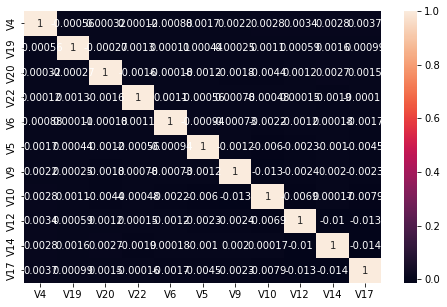

In [18]:
significant_feature = corr2.index[abs(creditcard.corr()['Class']>0.005)]
plt.subplots(figsize=(8, 5))
significant_corr = creditcard[significant_feature].corr()
sns.heatmap(significant_corr, annot=True)
plt.show()


In [19]:
significant_feature

Index(['V4', 'V19', 'V20', 'V22', 'V6', 'V5', 'V9', 'V10', 'V12', 'V14',
       'V17'],
      dtype='object')

In [20]:
# we are only going to use the significant features for our Class 
significant_= ['V4', 'V19', 'V20', 'V22', 'V6', 'V5', 'V9', 'V10', 'V12', 'V14',
       'V17']

In [21]:
significant_creditcard= creditcard[significant_]

In [22]:
x = significant_creditcard
y = creditcard.Class

In [23]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 283726, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split 
x_train, x_test,y_train, y_test = train_test_split(x, y, test_size=0.8 , random_state = 33)

In [25]:
print(x_train.shape)
print(y_train.shape)

(56745, 11)
(56745,)


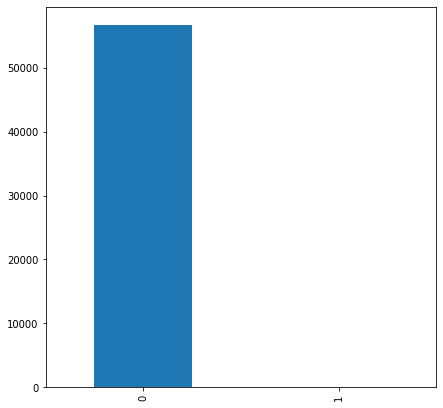

In [26]:
plt.figure(figsize = (7,7))
y_train.value_counts().plot(kind = 'bar');
# There is vast difference with the number of the valid transactions to the fradulent transactions 
# first lets make the model without balancing the data sets and then we try to use the same model with the balanced data sets 

# Preprocessing and Model Creation 

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=44, max_depth=8)
model1=rf.fit(x_train , y_train)
prediction1 = model1.predict(x_test)

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report

In [29]:
conf_m1 = confusion_matrix(y_test , prediction1)

In [30]:
conf_m1

array([[226574,     25],
       [    92,    290]], dtype=int64)

In [31]:
def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

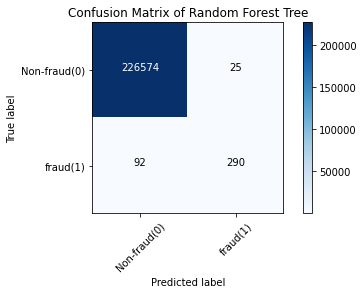

In [32]:
rf1_confM = plot_confusion_matrix(conf_m1, 
                                classes = ['Non-fraud(0)','fraud(1)'], 
                                normalize = False, title = 'Random Forest Tree')
plt.show()

In [33]:
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226599
           1       0.92      0.76      0.83       382

    accuracy                           1.00    226981
   macro avg       0.96      0.88      0.92    226981
weighted avg       1.00      1.00      1.00    226981



In [34]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
overSM_x,overSM_y = oversample.fit_resample(x,y)

In [35]:
##After Oversampling using the smote 
print("After Oversampling:")
no_of_fraud_records = len(overSM_y[overSM_y==1])
print(no_of_fraud_records)
no_of_valid_records = len(overSM_y[overSM_y==0])
print(no_of_valid_records)

After Oversampling:
283253
283253


In [36]:
overSM_x_train, overSM_x_test,overSM_y_train, overSM_y_test = train_test_split(overSM_x, overSM_y, test_size=0.8 , random_state = 33)

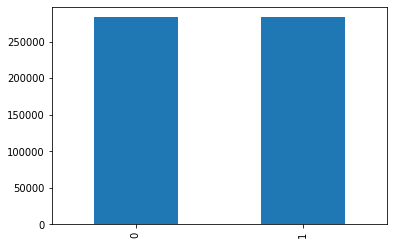

In [37]:
oversampled_data = pd.Series([no_of_valid_records, no_of_fraud_records], index=['0','1'])
oversampled_data.plot(kind= 'bar');

Hence the data sets has been balanced so lets try to use the RandomForestClassifer with the balanced datasets 

In [38]:
overSM_x_train

,V4,V19,V20,V22,V6,V5,V9,V10,V12,V14,V17
548386,4.950106,2.230480,0.322764,-0.004003,-2.699290,-0.672285,-3.319985,-7.378064,-9.416645,-11.294626,-13.312913
52427,-0.361325,0.687697,0.051183,0.463224,0.221508,0.426875,-1.010038,-0.564949,0.891775,0.394281,-1.036981
470444,6.152740,-1.114456,0.485739,-0.353715,-2.242613,-0.111601,-3.556308,-5.391558,-6.884562,-10.758213,-5.823997
139337,-0.157711,-0.490551,0.143708,-0.684447,-0.668179,0.031989,0.820995,1.183139,-0.434338,-0.686857,0.248141
420771,1.945310,-2.402489,-0.330387,0.638840,-0.169919,0.371421,0.183602,0.066898,-2.641341,1.248271,-0.060107
...,...,...,...,...,...,...,...,...,...,...,...
196665,-0.272305,1.061265,0.021207,-0.769167,-0.723230,0.438364,-0.590725,-0.468469,-0.004585,0.113511,-0.008975
158921,0.202947,0.541742,-0.258895,-0.764484,-0.356564,0.448278,0.985082,-0.102343,-0.178950,0.405255,-0.462994
223890,-3.335719,-1.338249,-0.341870,0.632797,1.535064,0.607774,-2.190483,0.604540,-0.862651,-0.193775,0.573511
393794,8.874427,2.394190,-0.081371,-0.133162,-2.489695,-8.070985,-5.382526,-11.285692,-17.016645,-10.699732,-22.383261


In [39]:
overSM_y_train

548386    1
52427     0
470444    1
139337    0
420771    1
         ..
196665    0
158921    0
223890    0
393794    1
104152    0
Name: Class, Length: 113301, dtype: int64

In [40]:
rf2= RandomForestClassifier(random_state=44, max_depth=8)
model2=rf2.fit(overSM_x_train , overSM_y_train)

In [41]:
prediction2 = model2.predict(overSM_x_test)

In [42]:
conf_m2 = confusion_matrix(overSM_y_test , prediction2)

In [43]:
conf_m2

array([[225268,   1201],
       [ 12128, 214608]], dtype=int64)

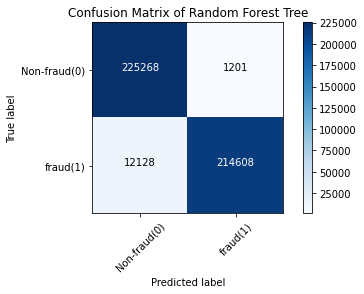

In [44]:
rf2_confM = plot_confusion_matrix(conf_m2, 
                                classes = ['Non-fraud(0)','fraud(1)'], 
                                normalize = False, title = 'Random Forest Tree')
plt.show()

In [45]:
print(classification_report(overSM_y_test, prediction2))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    226469
           1       0.99      0.95      0.97    226736

    accuracy                           0.97    453205
   macro avg       0.97      0.97      0.97    453205
weighted avg       0.97      0.97      0.97    453205



# Model Evalulation 


In [53]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics

In [54]:
# Creating function to display ROC-AUC score, f1 score and classification report
def display_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
    print("\n\n")
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

In [55]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

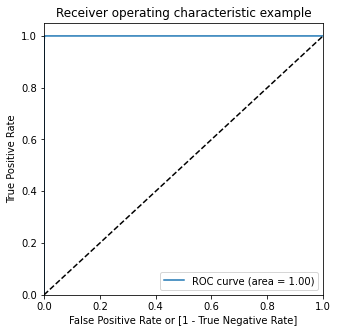

In [56]:
y_train_pred_proba = model1.predict_proba(x_train)[:,1]
draw_roc(y_train, y_train_pred_proba)


Obviously ROC will be 1 which means it is fitted to the training data sets properly 

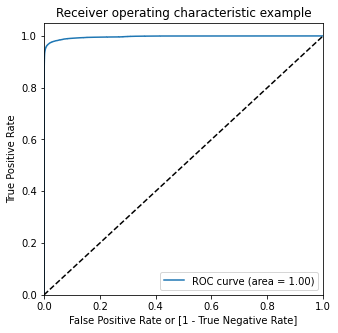

In [58]:
y_train_pred_proba2 = model2.predict_proba(overSM_x_train)[:,1]
draw_roc(overSM_y_train, y_train_pred_proba2)


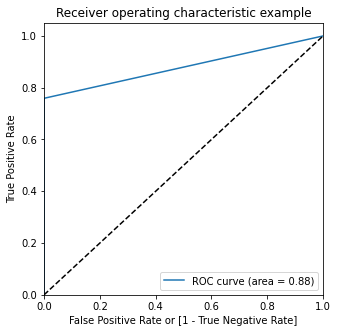

In [61]:
y_test_pred1 = model1.predict(x_test)
draw_roc(y_test, y_test_pred1)

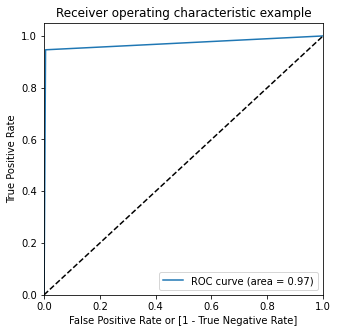

In [62]:
y_test_pred2 = model2.predict(overSM_x_test)
draw_roc(overSM_y_test, y_test_pred2)